In [1]:
#Import libraries
from predictions import prediction
import pandas as pd

#Read variable excel
variables_df = pd.read_csv('variables_df.csv', index_col=[0])

#Extract variables
variables_dict = variables_df.to_dict()['0']
batch_size = int(variables_dict['batch_size_valid'])
window_size = int(variables_dict['window_size'])
sentiment = bool(variables_dict['sentiment'])
sentiment_type = variables_dict['sentiment_type']
ticker = variables_dict['ticker']
excel_reports = variables_dict['excel_reports']
entry_candle = variables_dict['entry_candle']
model_name = variables_dict['model_name']
indicator1 = int(variables_dict['indicator1'])
indicator2 = int(variables_dict['indicator2'])
indicator3 = int(variables_dict['indicator3'])
aggr_function = variables_dict['aggr_function']
condition = bool(variables_dict['condition'])
period = variables_dict['period']
formation_window = int(variables_dict['formation_window'])

acceptance = float(variables_dict['acceptance'])
penalization = float(variables_dict['penalization'])

# Read excels
x_test = pd.read_csv(f'{ticker}_test_data.csv', index_col=[0])
x_test_x = pd.read_csv(f'{ticker}_x_test_x.csv', index_col=[0])
news_df = pd.read_excel(
        f'{ticker}_sentiment_analysis_final.xlsx', index_col=[0])
Dates = pd.read_csv(f'{ticker}_Dates.csv', index_col=[0])
Dates = Dates.iloc[:, 0]

#Run it
performance_df = prediction()

31/31 [==============================] - 3s 52ms/step
--------> GetTensoredDataset completed

--------> ReverseNormalization completed

--------> GetFinalDataframe



In [2]:
from final_evaluation import GetModelPerformance

print(f"ticker: {str.upper(ticker)}\n")
print('Acceptance: ',acceptance)
print(f'Penalization: {penalization} \n')

penalization = 1
GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                            penalization=1,
                            entry_candle='Current Open',  # Current Open
                            budget=10000,
                            window_size=window_size,
                            export_excel=False,
                            excel_path=excel_reports,
                            sentiment=sentiment)

trades_df = GetModelPerformance.transform(performance_df)



ticker: INTC

Acceptance:  0.5
Penalization: 0.0 

Formations:  31
period: 2021-12-06 - 2019-12-09
Entry Candle:  Current Open

Total Trades:  19
Profit Trades:  17
Loss Trades:  2

Win Ratio: 89.0 %
Loss Ratio: 11 %

Trade nr with exact TP:  12
Ratio of exact TP: 63.16 %

Average profit per trade:  150

Gross profit:  2859
Gross loss:  -960

Net profit:  1899


In [3]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,
                             budget=10000,
                             window_size=window_size,
                             export_excel=False,
                             excel_path=excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)

--------> GetPerformanceReport completed



<Figure size 1600x640 with 0 Axes>

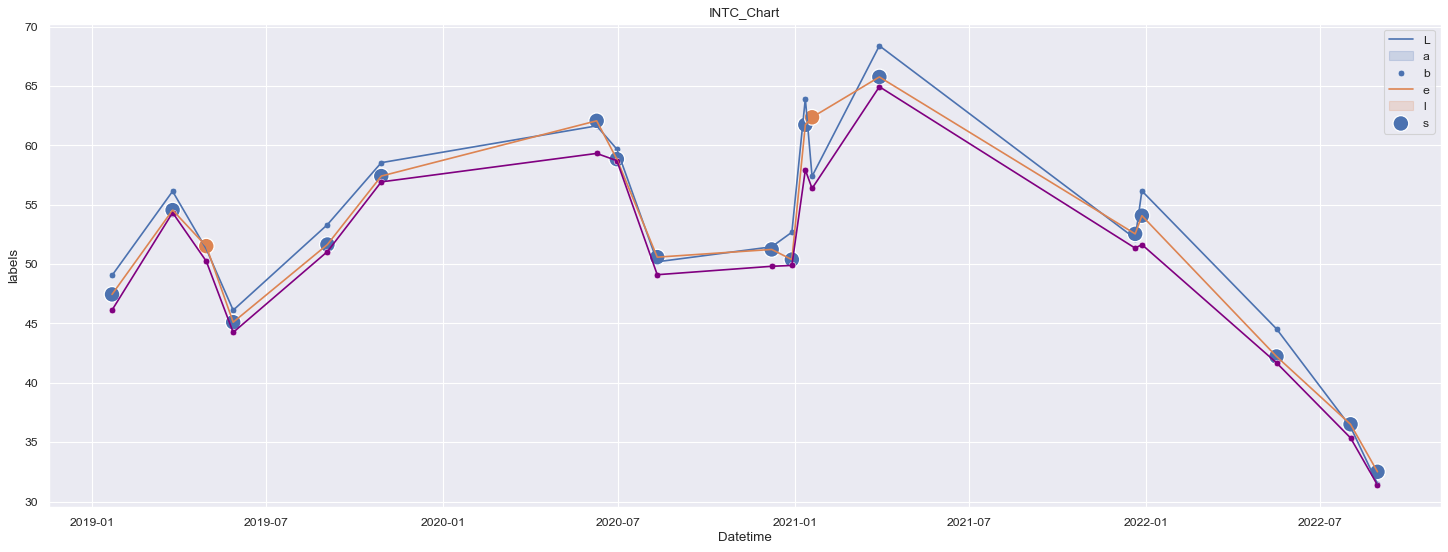

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(20, 8), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry','profit']]
df_plot = df_plot[df_plot.labels != 'nn']
df_plot['loss'] = df_plot['profit'].apply(lambda x: 1 if x < 0 else 0)

import seaborn as sns
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
figure(figsize=(20, 8), dpi=80)

line_labels = sns.lineplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

scatter_labels = sns.scatterplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

line_prediction = sns.lineplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,palette="cool")

scatter_prediction = sns.scatterplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,hue=df_plot.loss,s=200)

line_entry = sns.lineplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')

scatter_entry= sns.scatterplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')                


plt.xticks(rotation=0)
plt.legend('Labels')
plt.title(f'{str.upper(ticker)}_Chart')
plt.annotate("Iris Dataset", (3, 5), fontsize=50)
plt.show()
#plt.tight_layout()
#df_plot

In [5]:
lossing_trades = trades_df_final[trades_df_final['profit']<0]
lossing_trades

,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade,Entry,Performance
36,49.889999,52.689999,49.330002,51.650002,49.607555,49.194764,49.850513,nn,nn,0.0,2021-01-04,-0.870003,10,nn,nn
37,51.290001,60.250000,51.250000,57.580002,52.265037,51.058150,50.553194,nn,nn,0.0,2021-01-11,-0.870003,10,nn,nn
38,57.939999,63.950001,56.650002,56.660000,53.730025,52.303006,51.108358,nn,nn,0.0,2021-01-18,-0.870003,10,nn,nn
39,56.380001,57.400002,53.299999,55.509998,52.265037,51.058150,50.553194,57.400002,62.374443,0.0,2021-01-19,-0.870003,10,56.380001,-154.0
60,56.459999,59.590000,55.919998,58.490002,56.012920,54.824461,51.024762,nn,nn,0.0,2019-04-15,-4.049999,16,nn,nn
61,58.150002,59.290001,51.520000,52.430000,54.818613,54.292359,51.024762,nn,nn,0.0,2019-04-22,-4.049999,16,nn,nn
62,52.169998,52.430000,50.119999,51.750000,53.795742,53.727390,51.024762,nn,nn,0.0,2019-04-29,-4.049999,16,nn,nn
63,50.250000,51.279999,45.099998,46.200001,54.818613,54.292359,51.024762,51.279999,51.516718,0.0,2019-04-30,-4.049999,16,50.25,-806.0


In [8]:
from final_evaluation import MakeSinglePrediction

#model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2023-02-11",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10950,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.head(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation



Trading condition passed, you can make prediction

Entry price:  27.8


,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,CombinedVaderSentiment
0,2023-01-23,29.330000,30.49,26.780001,28.16,28.544416,28.474928,29.741243,0.17875
1,2023-01-30,27.719999,31.17,27.530001,30.32,29.136277,28.884944,29.793857,0.00000
2,2023-02-06,29.549999,29.65,27.570000,27.73,28.667518,28.628290,29.606234,0.00000



Ticker:  intc
1/1 [==============================] - 2s 2s/step

Entry candle (Current Close)

Budget:  10950

Entry price:  27.73
Prediction:  29.78
Expected Market move:  2.05
Expected Profit:  809.65


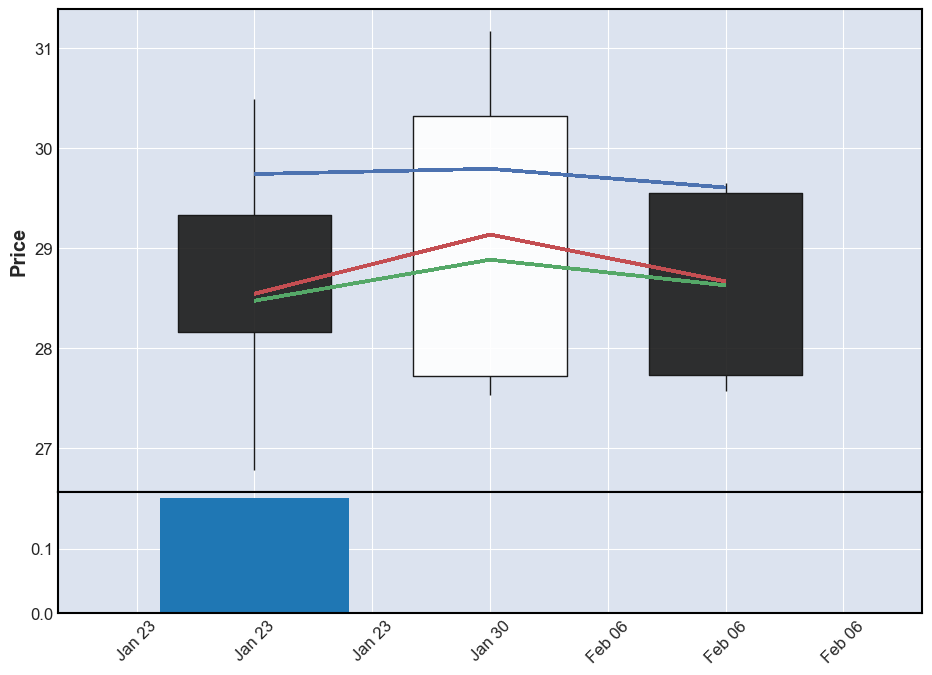

In [9]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)


In [10]:
target = 29.78
entry = 28.745

diff = target - entry
380*diff

393.30000000000007